# Subgraph modification
Two main methods of subgraph modification is implemented here: DBSCAN and enrichment and they should be performed after first going through the "Preprocessing" notebook.

DBSCAN is suited for networks with relatively high recosntruction qualities, as it iterates on the reconstructed positions to improve reconstruction quality.

Enrichment is best performed for highly filtered, sparse networks and does not require any previous reconstruction only an edgelist and edgelists from lower filtering thresholds. It can be performed on both bipartite or unipartite networks.

## DBSCAN iterative reconstruction
DBSCAN iterative reconstruction utilizes the reconstructed bead positions for beads sharing an edge with each cell individually.

By clustering the bead positions we can remove edges to bead not assigned to the largest cluster in the reconstruction, as a perfect, reconstructed spatial network should have no long-range edges removing these lessen compressive strain on the system, improving reconstruction significantly.
Before running the DBSCAN subgraph modification itself, some parameter optimization should be performed recommended to choose the parameters that result in the largest amount of single-cluster cells.

Initializing files

Current Threshold:  1
Initializing files
Output_files\tonsil\run=all_cells_filters=numi2-1500_nconn2-1500_w1\bi-umis_1_2D
['full_reconstruction_summary_subgraph_1_N=93859.csv']
ungated
         source  target         source_bc       target_bc   source_type  \
0             1    9353  AAACCCATCATCGCAA  AAAAATGTCCAGCC      B_memory   
1            18    9353  AAACGCTGTTAAGACA  AAAAATGTCCAGCC            NK   
2            56    9353  AAAGGGCTCTCCACTG  AAAAATGTCCAGCC       B_naive   
3            94    9353  AAAGTGAAGTCATACC  AAAAATGTCCAGCC  unknown_cell   
4           184    9353  AACCTTTGTCGCGGTT  AAAAATGTCCAGCC  unknown_cell   
...         ...     ...               ...             ...           ...   
1615242    9340  388508  TTTGGTTCAAATTGCC  CTAGTACTCCTCAC  unknown_cell   
1615243    9260  388749  TTTATGCCAGATAAAC  TGGCGGCTCATACC        plasma   
1615244    9341  388749  TTTGGTTCAGCATCTA  TGGCGGCTCATACC  unknown_cell   
1615245    9280  389099  TTTCAGTCAACACACT  TA

KeyboardInterrupt: 

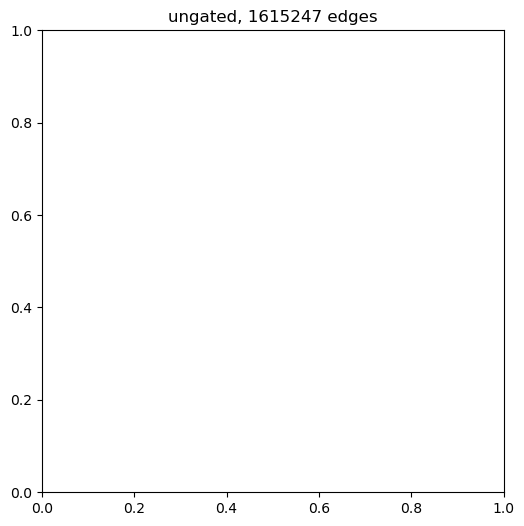

In [1]:
from Utils import *
config = ConfigLoader('config_subgraph_analysis.py')

from additional_subgraph_analysis import additional_subgraph_analysis
categories = ["analyse"] # analyse or position
plot_what = ["dbscan_calculation", "dbscan_analysis"]

additional_arguments = [range(5, 16), range(2,8)]
for cat in categories:
    for plotting_type in plot_what:
        additional_subgraph_analysis(config, category = cat, plotting_type = plotting_type, additional_arguments = additional_arguments)
plt.show()

In [ ]:
from Utils import *
from subgraph_modification_functions import perform_dbscan_gated_double_reconstruction

config = ConfigLoader("config_subgraph_modification.py")
perform_dbscan_gated_double_reconstruction(config)

# Enrichment